### 1. Load CATPCHA images and get the transformed (X,y) data

In [5]:
import torch

from helper_functions.data_transformation import get_transformed_data_v2, get_transformed_data_for_captcha_evaluation

train_folder = "../data/train/combine2"
test_folder = "../data/test/combine2"
cached_data_path = "../data/prepared_data_cnn_v3.pth"

try:
    # Load the prepared data from cache if it already exists
    X_train, y_train, X_test, y_test, X_test_captcha, y_test_captcha, failed_segmentation_info = torch.load(cached_data_path)
    print("Loaded prepared data from cache.")

except FileNotFoundError:
    # Else prepare the data and save it
    X_train, y_train = get_transformed_data_v2(train_folder, is_train=True)
    X_test, y_test = get_transformed_data_v2(test_folder, is_train=False)
    X_test_captcha, y_test_captcha, failed_segmentation_info = get_transformed_data_for_captcha_evaluation(test_folder)

    torch.save((X_train, y_train, X_test, y_test, X_test_captcha, y_test_captcha, failed_segmentation_info), cached_data_path)
    print("Saved prepared data to cache.")


Preparing Test Data for CAPTCHA Evaluation: 100%|██████████| 1825/1825 [00:03<00:00, 496.97it/s]


Saved prepared data to cache.


### 2. Instantiate basic CNN model and train it

In [6]:
from models.cnn_v3 import CNN, CNNParams
from helper_functions.data_transformation import IMG_HEIGHT, IMG_WIDTH


# Instantiate model
cnn_params: CNNParams = {
    "num_classes": 36,
    "input_shape": (1, IMG_HEIGHT, IMG_WIDTH), # (channels, height, width)
    "learning_rate": 1.1*1e-3,
    "num_epochs": 30,
    "batch_size": 250,
}
cnn = CNN(cnn_params)

# Train model
cached_model_path = "../trained_models/cnn_v3.2.pth"
try:
    # Load the trained model from cache if it already exists
    cnn.load_trained_model(cached_model_path)
except FileNotFoundError:
    # Else train the model and save it
    cnn.train_model(X_train, y_train)
    cnn.save_trained_model(cached_model_path)


Trained model (took 15m 20s) has the saved epoch losses: 
Epoch 1, Loss: 1.4163060951066184
Epoch 2, Loss: 0.7006712097388047
Epoch 3, Loss: 0.5784492924080028
Epoch 4, Loss: 0.47067801987791397
Epoch 5, Loss: 0.4036868686651017
Epoch 6, Loss: 0.3955486349084161
Epoch 7, Loss: 0.32386858573743516
Epoch 8, Loss: 0.2655709122756978
Epoch 9, Loss: 0.23879774696343428
Epoch 10, Loss: 0.2264442241692043
Epoch 11, Loss: 0.1903814999061031
Epoch 12, Loss: 0.12237864907283882
Epoch 13, Loss: 0.09796243429288164
Epoch 14, Loss: 0.08961527132904613
Epoch 15, Loss: 0.08606931350968934
Epoch 16, Loss: 0.08994940973140976
Epoch 17, Loss: 0.07848307625813918
Epoch 18, Loss: 0.04870653630501324
Epoch 19, Loss: 0.04294214342310504
Epoch 20, Loss: 0.03984122934353935
Epoch 21, Loss: 0.03303178642726653
Epoch 22, Loss: 0.03071256243083235
Epoch 23, Loss: 0.029272083313549524
Epoch 24, Loss: 0.027655545081552508
Epoch 25, Loss: 0.02339638414682
Epoch 26, Loss: 0.02301151395679315
Epoch 27, Loss: 0.022294

### 3. Evaluate CNN model

Character level performance (skipping SF): {
  "accuracy": 0.906,
  "precision": 0.906,
  "recall": 0.905,
  "f1_score": 0.905
}

Captcha level performance: {
  "segmentation_accuracy": 0.934,
  "captcha_accuracy (skipping SF)": 0.649,
  "captcha_accuracy (including SF)": 0.606,
  "character_accuracy (including SF)": 0.846
}

Confusion matrix for individual characters (skipping SF):


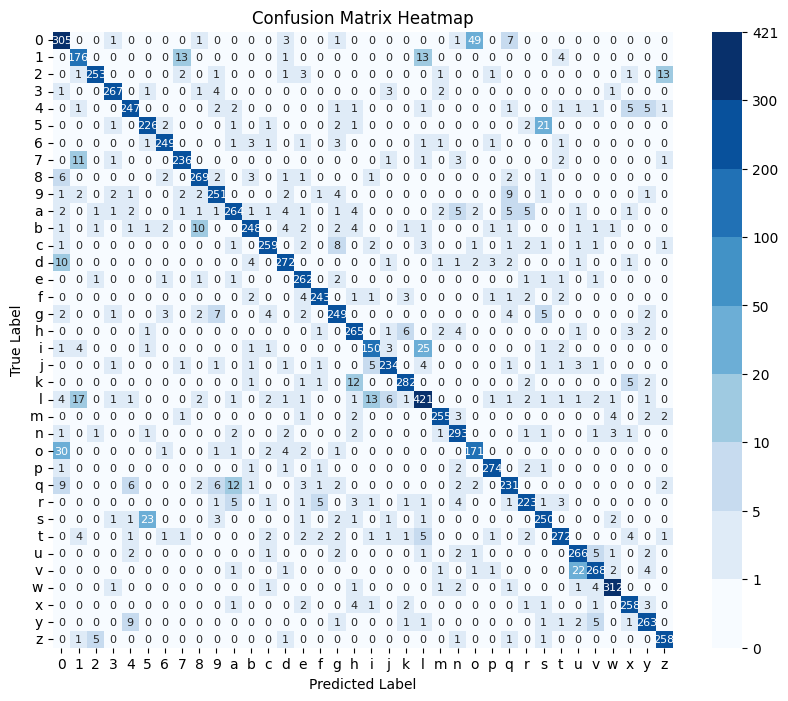

Individual character performance and top confusions (skipping SF):


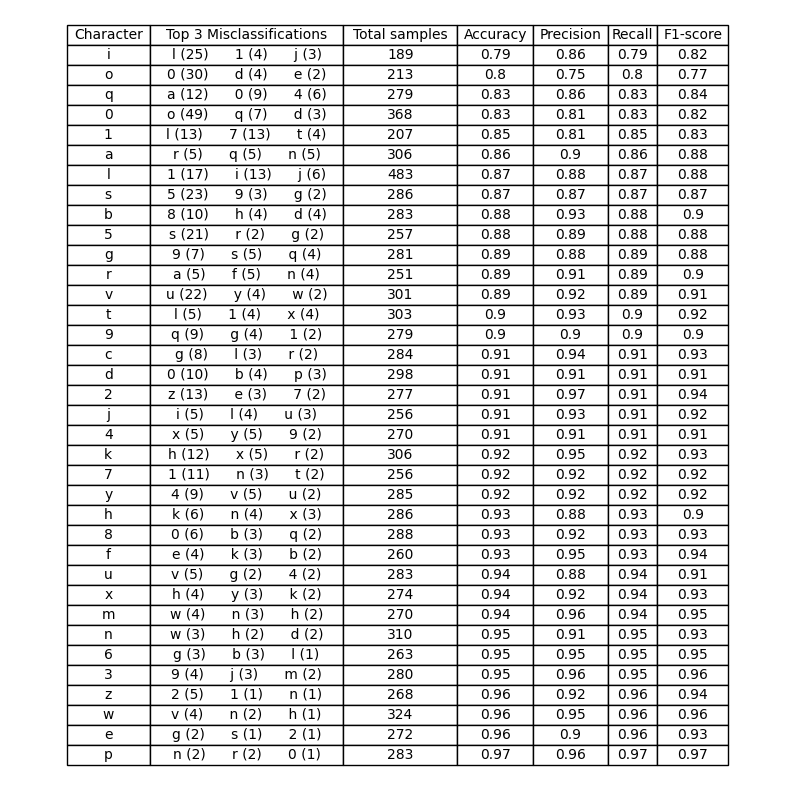

In [7]:
from helper_functions.evaluation import evaluate_character_performance, evaluate_captcha_performance, evaluate_individual_character_performance

evaluate_character_performance(cnn.model, X_test, y_test)
evaluate_captcha_performance(cnn.model, X_test_captcha, y_test_captcha, failed_segmentation_info)
evaluate_individual_character_performance(cnn.model, X_test, y_test)